In [15]:
import pandas as pd
file_path = "./publicdataanalysis/data/edu200.csv"
report = pd.read_csv(file_path)
print(report.shape)
print(report.info())

(153538, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153538 entries, 0 to 153537
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MID                 153538 non-null  int64  
 1   JID                 153538 non-null  int64  
 2   INSUP_TP_CD         153538 non-null  int64  
 3   SEX_TP_CD           153538 non-null  int64  
 4   PAT_AGE             153538 non-null  int64  
 5   YID                 153538 non-null  int64  
 6   CL_CD               153538 non-null  int64  
 7   RVD_PLC_CD          153538 non-null  int64  
 8   FOM_TP_CD           153538 non-null  int64  
 9   MAIN_SICK           153538 non-null  object 
 10  SUB_SICK            111073 non-null  object 
 11  DGSBJT_CD           153538 non-null  object 
 12  RECU_FR_DD          153538 non-null  int64  
 13  RECU_TO_DD          153538 non-null  int64  
 14  FST_DD              2772 non-null    float64
 15  VST_DDCNT           1

In [17]:
print(report['MAIN_SICK'].unique())

['H108' 'M509' 'M472' ... 'Z201' 'R438' 'S001']


In [21]:
print(len(report['MAIN_SICK'].unique()))

2438


In [44]:
report['SUB_SICK'].value_counts()

SUB_SICK
K297    4320
*       4151
E785    3026
I109    2768
K30     1990
        ... 
M151       1
I720       1
G563       1
Z391       1
N430       1
Name: count, Length: 2282, dtype: int64

In [46]:
report['MAIN_SICK'].value_counts()

MAIN_SICK
I109    7512
*       7099
M545    4161
K053    4068
M170    2816
        ... 
R935       1
D091       1
N450       1
K601       1
S001       1
Name: count, Length: 2438, dtype: int64

In [52]:
cd_count = report.groupby('DGSBJT_CD')['RVD_RPE_TAMT_AMT'].count()
print(cd_count,' 진료과목 코드:', cd_count.index)

DGSBJT_CD
$       249
00       66
01    43528
02     3257
03     3361
04     7591
05    23912
06     3996
07      648
08      380
09     2369
10     5638
11      637
12     8895
13     5961
14     4097
15     3467
16      314
17     1490
18        3
19       36
20       22
21     2478
22       24
23     3189
24     1677
25       60
26       10
49      599
50     1301
51      786
52        6
53        8
54     3108
55     3333
56       37
57       26
59        3
79        1
80     7687
81        3
82        6
83       40
84       53
85     8637
86      535
87        9
99        5
Name: RVD_RPE_TAMT_AMT, dtype: int64  진료과목 코드: Index(['$', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '59', '79', '80', '81', '82', '83', '84', '85', '86', '87', '99'],
      dtype='object', name='DGSBJT_CD')


In [56]:
cd_amt_mean=report.groupby('DGSBJT_CD')['RVD_RPE_TAMT_AMT'].mean()
cd_amt_mean

DGSBJT_CD
$     260951.807229
00    113909.090909
01     56303.161184
02     54680.073687
03     56744.421303
04     77510.472928
05     45938.190030
06     73390.390390
07     66148.148148
08     57626.315789
09     71154.917687
10     81189.251508
11     38293.563579
12     73729.061270
13     39454.957222
14     23566.512082
15     66604.268820
16     84187.898089
17    149733.557047
18     61666.666667
19     50611.111111
20     51954.545455
21     61203.793382
22     76500.000000
23     47177.485105
24    130088.252832
25     38766.666667
26     57300.000000
49     48777.963272
50     43108.378171
51    164688.295165
52     37833.333333
53     41375.000000
54     51217.824968
55     43803.480348
56     38243.243243
57     52307.692308
59     16666.666667
79     12000.000000
80     29720.697281
81    237333.333333
82     42500.000000
83     24525.000000
84     23641.509434
85     31915.016788
86     45968.224299
87    233666.666667
99    118200.000000
Name: RVD_RPE_TAMT_AMT, dtype:

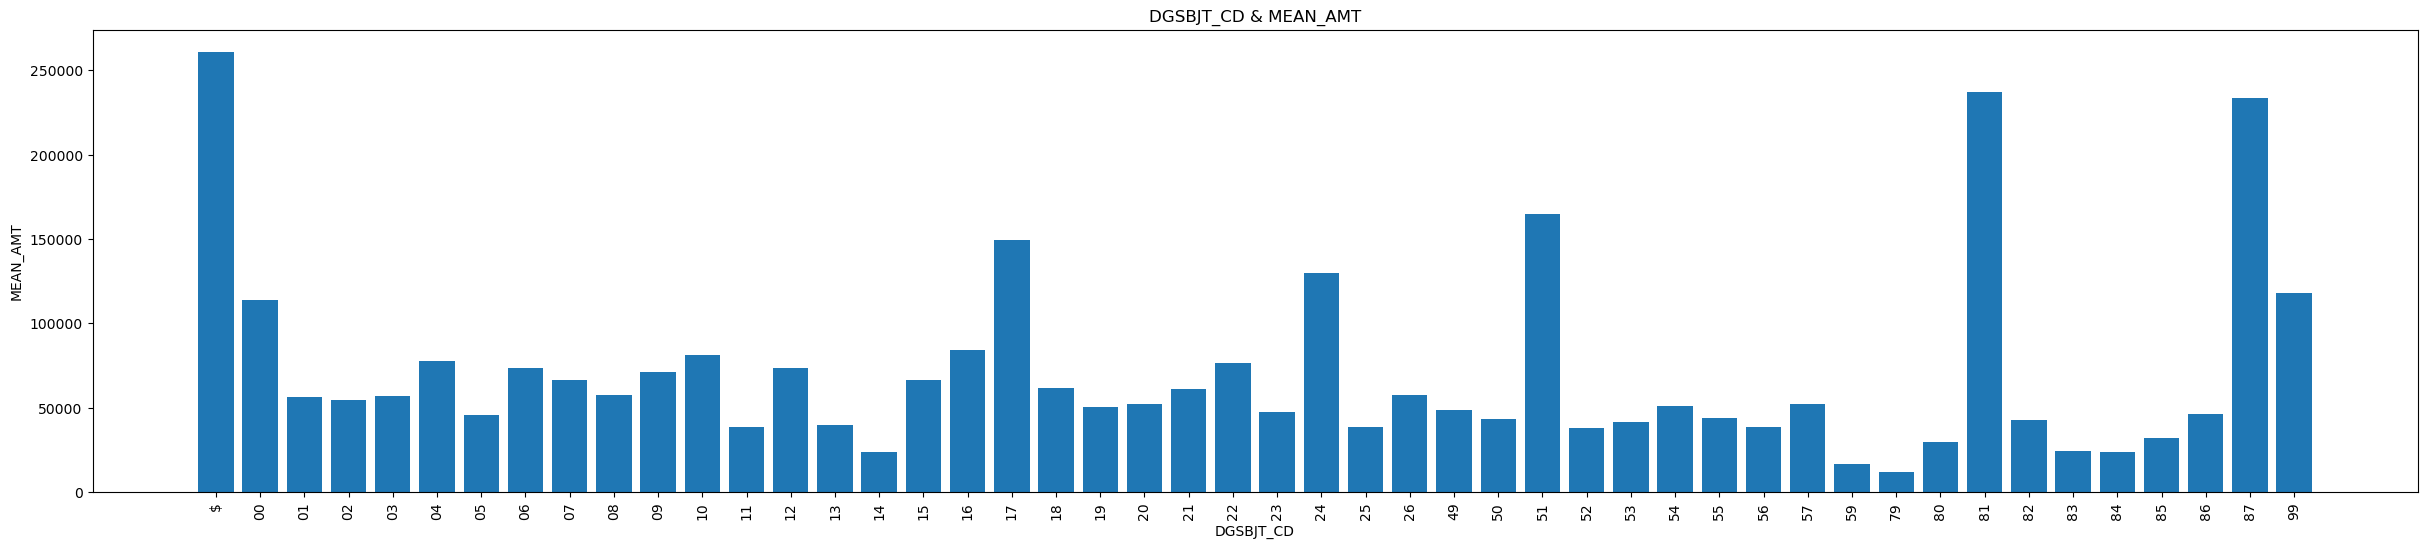

In [74]:
import matplotlib.pyplot as plt
import numpy as np

item_names = cd_count.index
x_pos = np.arange(len(cd_count))
y_pos = cd_amt_mean

plt.figure(figsize = (30, 6))
plt.bar(x_pos, y_pos, align = 'center')
plt.xlabel("DGSBJT_CD")
plt.ylabel("MEAN_AMT")
plt.xticks(x_pos, item_names, rotation = 90)
plt.title("DGSBJT_CD & MEAN_AMT")
plt.show()

In [76]:
ms_count = report.groupby('MAIN_SICK')['RVD_RPE_TAMT_AMT'].count()
print(ms_count,' 주상병:', ms_count.index)
ms_amt_mean=report.groupby('MAIN_SICK')['RVD_RPE_TAMT_AMT'].mean()
ms_amt_mean

MAIN_SICK
*       7099
A020       1
A044      11
A045       2
A047       9
        ... 
Z965       3
Z966       6
Z968       3
Z972       4
Z988     268
Name: RVD_RPE_TAMT_AMT, Length: 2438, dtype: int64  주상병: Index(['*', 'A020', 'A044', 'A045', 'A047', 'A048', 'A049', 'A059', 'A062',
       'A069',
       ...
       'Z947', 'Z950', 'Z955', 'Z961', 'Z962', 'Z965', 'Z966', 'Z968', 'Z972',
       'Z988'],
      dtype='object', name='MAIN_SICK', length=2438)


MAIN_SICK
*        64965.347232
A020     64000.000000
A044     13272.727273
A045    142000.000000
A047     67444.444444
            ...      
Z965     68666.666667
Z966     31166.666667
Z968    143000.000000
Z972     25000.000000
Z988     41992.537313
Name: RVD_RPE_TAMT_AMT, Length: 2438, dtype: float64

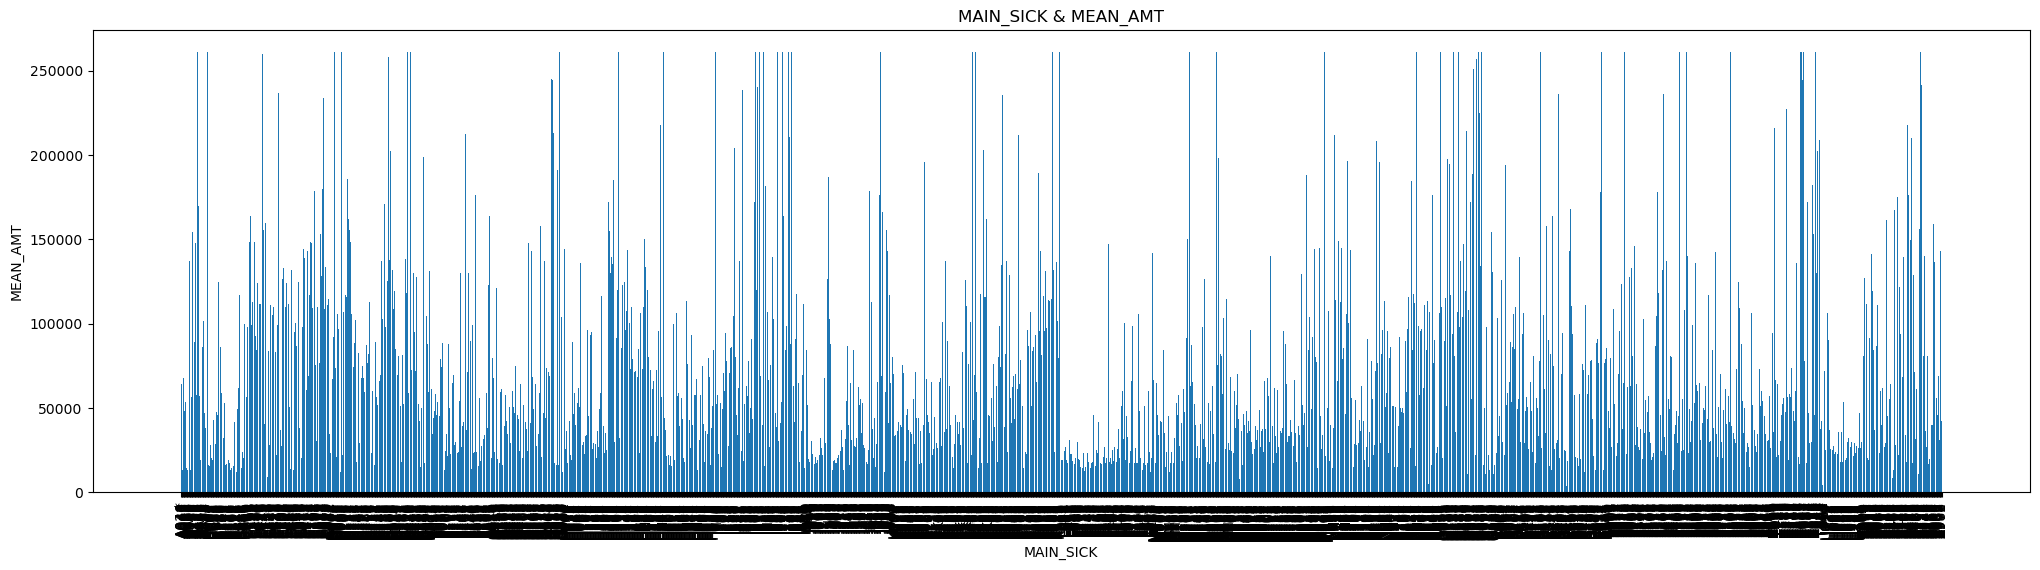

In [81]:
s_names = ms_count.index
x_pos = np.arange(len(ms_count))
y_pos = ms_amt_mean

plt.figure(figsize = (25, 6))
plt.bar(x_pos, y_pos, align = 'center')
plt.xlabel("MAIN_SICK")
plt.ylabel("MEAN_AMT")
plt.xticks(x_pos, s_names, rotation = 90)
plt.title("MAIN_SICK & MEAN_AMT")
plt.show()

In [93]:
mr_count = report.groupby(['DGSBJT_CD', 'MAIN_SICK'])['RVD_RPE_TAMT_AMT'].count()
print(mr_count,'진료과목, 주상병', mr_count.index)
mr_amt_mean=report.groupby(['DGSBJT_CD','MAIN_SICK'])['RVD_RPE_TAMT_AMT'].mean()
mr_amt_mean

DGSBJT_CD  MAIN_SICK
$          D251          1
           D259          2
           D270          2
           H250         24
           H251         41
                        ..
87         S335          2
           S434          1
99         M480          2
           M501          2
           Z000          1
Name: RVD_RPE_TAMT_AMT, Length: 6152, dtype: int64 진료과목, 주상병 MultiIndex([( '$', 'D251'),
            ( '$', 'D259'),
            ( '$', 'D270'),
            ( '$', 'H250'),
            ( '$', 'H251'),
            ( '$', 'H258'),
            ( '$', 'H259'),
            ( '$', 'H260'),
            ( '$', 'H262'),
            ( '$', 'H268'),
            ...
            ('87', 'C169'),
            ('87', 'M511'),
            ('87', 'M518'),
            ('87', 'M542'),
            ('87', 'M545'),
            ('87', 'S335'),
            ('87', 'S434'),
            ('99', 'M480'),
            ('99', 'M501'),
            ('99', 'Z000')],
           names=['DGSBJT_CD', 'MAIN_SICK'],

DGSBJT_CD  MAIN_SICK
$          D251         261000.0
           D259         261000.0
           D270         261000.0
           H250         261000.0
           H251         261000.0
                          ...   
87         S335         261000.0
           S434         261000.0
99         M480         155500.0
           M501         119500.0
           Z000          41000.0
Name: RVD_RPE_TAMT_AMT, Length: 6152, dtype: float64

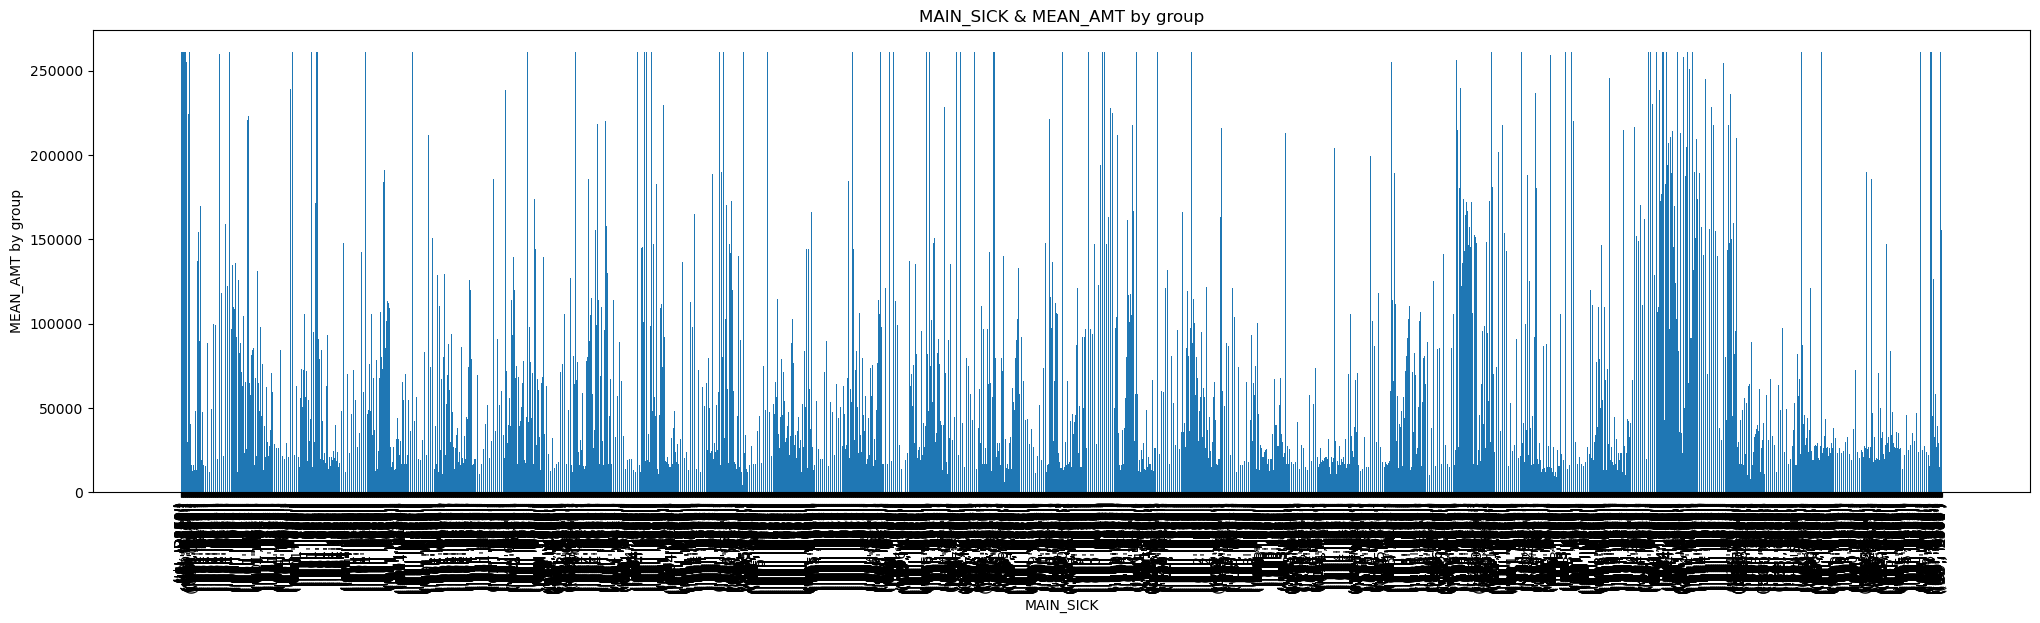

In [97]:
mr_names = mr_count.index
x_pos = np.arange(len(mr_count))
y_pos = mr_amt_mean

plt.figure(figsize = (25, 6))
plt.bar(x_pos, y_pos, align = 'center')
plt.xlabel("MAIN_SICK")
plt.ylabel("MEAN_AMT by group")
plt.xticks(x_pos, mr_names, rotation = 90)
plt.title("MAIN_SICK & MEAN_AMT by group")
plt.show()

In [157]:
cl_count = report.groupby(['CL_CD'])['RVD_RPE_TAMT_AMT'].count()
print(cl_count,'요양기관', cl_count.index)
cl_amt_mean=report.groupby(['CL_CD'])['RVD_RPE_TAMT_AMT']
cl_amt_mean

CL_CD
10    39012
21    13518
28      465
31    74174
51     8971
90    17398
Name: RVD_RPE_TAMT_AMT, dtype: int64 요양기관 Index([10, 21, 28, 31, 51, 90], dtype='int64', name='CL_CD')


In [159]:
amt_mean = report['RVD_RPE_TAMT_AMT'].sum() / len(report['CL_CD'].unique())
amt_mean

1440293000.0

In [185]:
def flat_cols(df):
    df.columns = [' / '.join(x) for x in df.columns.to_flat_index()]
    return df
    
cl_count = report.groupby(['CL_CD'])['RVD_RPE_TAMT_AMT'].count()
print(cl_count,'요양기관', cl_count.index)
cl_amt_sum = report.groupby(['CL_CD']).agg({'RVD_RPE_TAMT_AMT': 'sum'})
cl_amt_deviation=report.groupby(['CL_CD']).agg({'RVD_RPE_TAMT_AMT': 'sum'})
print(cl_amt_deviation)
cl_amt_deviation['Deviation'] = cl_amt_deviation['RVD_RPE_TAMT_AMT'] - amt_mean
cl_amt_deviation

CL_CD
10    39012
21    13518
28      465
31    74174
51     8971
90    17398
Name: RVD_RPE_TAMT_AMT, dtype: int64 요양기관 Index([10, 21, 28, 31, 51, 90], dtype='int64', name='CL_CD')
       RVD_RPE_TAMT_AMT
CL_CD                  
10           3580327000
21            891633000
28             78202000
31           3015387000
51            511346000
90            564863000


,RVD_RPE_TAMT_AMT,Deviation
CL_CD,,
10,3580327000,2.140034e+09
21,891633000,-5.486600e+08
28,78202000,-1.362091e+09
31,3015387000,1.575094e+09
51,511346000,-9.289470e+08
90,564863000,-8.754300e+08


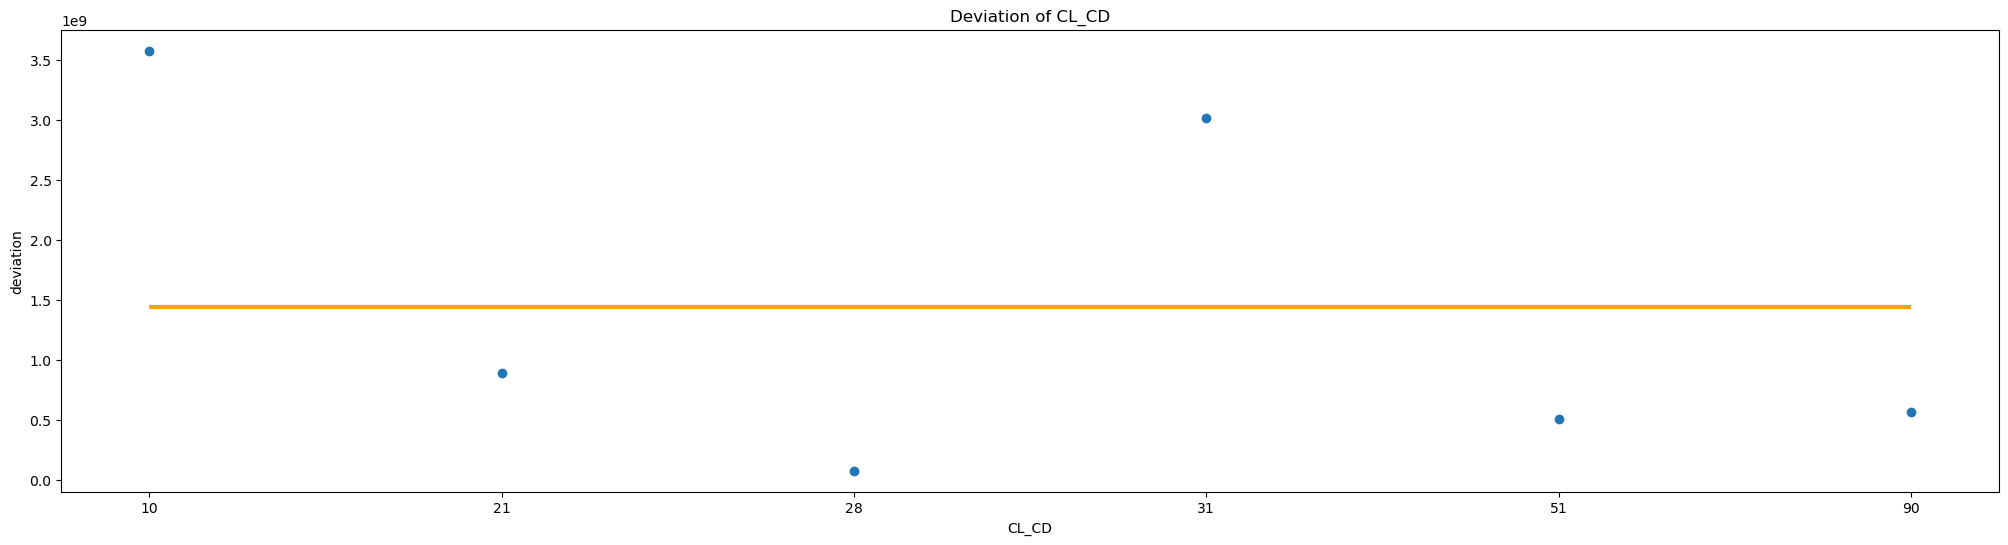

In [197]:
cl_names = cl_count.index
x_pos = np.arange(len(cl_count))
y_pos = cl_amt_deviation

plt.figure(figsize = (25, 6))
#plt.fill(x_pos, y_pos,color ='lightgray', alpha = 0.3)
#plt.plot(amt_mean)
#plt.bar(x_pos, cl_amt_sum, align = 'center')
plt.scatter(x_pos, cl_amt_sum)
plt.plot(amt_mean)
#plt.plot(x_pos, y_pos)
plt.hlines(amt_mean, 0, 5, color='orange', linestyle='solid', linewidth=3)
plt.xlabel("CL_CD")
plt.ylabel("deviation")
plt.xticks(x_pos, cl_names)
plt.title("Deviation of CL_CD")
plt.show()

In [ ]:
####################################################################
#A주제

In [199]:
mid_slf_count=report.groupby('MAIDCL_CD')['RVD_SLF_BRDN_AMT'].count()
mid_slf_mean = report.groupby('MAIDCL_CD')['RVD_SLF_BRDN_AMT'].mean()
mid_slf_mean

MAIDCL_CD
$    18357.253579
Name: RVD_SLF_BRDN_AMT, dtype: float64

In [300]:
noc_data = [['E66'], ['H93'], ['H53'], ['I10'], ['E10'], ['E11'], ['D74'], ['C64'], ['K77'], ['A16'], ['A15'], ['I71'], ['C00'], ['C01'], ['C02'], ['C03'], ['C04'], ['C05'], ['C06'], ['C08'], ['C09'], ['Z00']]

noc_df = pd.DataFrame(noc_data, columns=['NOC_SICK'])
print(noc_df)


   NOC_SICK
0       E66
1       H93
2       H53
3       I10
4       E10
5       E11
6       D74
7       C64
8       K77
9       A16
10      A15
11      I71
12      C00
13      C01
14      C02
15      C03
16      C04
17      C05
18      C06
19      C08
20      C09
21      Z00


In [392]:
noc_list = noc_df['NOC_SICK'].tolist()

noc = report.loc[report['MAIN_SICK'].str[:3].isin(noc_list)]
noc

,MID,JID,INSUP_TP_CD,SEX_TP_CD,PAT_AGE,YID,CL_CD,RVD_PLC_CD,FOM_TP_CD,MAIN_SICK,...,RVD_INSUP_BRDN_AMT,SOPR_YN,OINJ_TP_CD,PRCL_SYM_TP_CD,INJ_EXA_TP_CD,DGRSLT_TP_CD,IPAT_ARIV_PTH_TP,MAIDCL_CD,DMD_TP_CD,DGTGTP_TP_CD
26,68867,2,4,2,60,8076,31,2,31,E119,...,8000,0,0,$,$,1,$,$,0,$
43,95982,2,4,2,60,8076,31,2,31,E119,...,42000,0,0,$,$,1,$,$,0,$
91,219585,2,4,2,60,8412,31,2,31,I109,...,14000,0,0,$,$,1,$,$,0,$
96,226210,2,4,2,60,8412,31,2,31,I109,...,10000,0,0,$,$,1,$,$,0,$
102,237578,2,4,2,60,8412,31,2,31,I109,...,64000,0,0,$,$,1,$,$,0,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153388,292334,3995,4,2,50,13843,31,3,31,Z000,...,29000,0,0,$,$,1,$,$,0,$
153443,139620,3996,4,2,75,3380,31,1,31,H931,...,11000,0,0,$,$,1,$,$,0,$
153454,172137,3996,4,2,75,3380,31,1,31,H931,...,11000,0,0,$,$,1,$,$,0,$
153478,226896,3996,4,2,75,3380,31,1,31,H931,...,15000,0,0,$,$,1,$,$,0,$


In [ ]:
#noc_m = noc.loc[noc['SEX_TP_CD'] == '1']
#noc_w = noc.loc[noc['SEX_TP_CD'] == '2']
#noc_e = noc.loc[noc['SEX_TP_CD'] == '9']

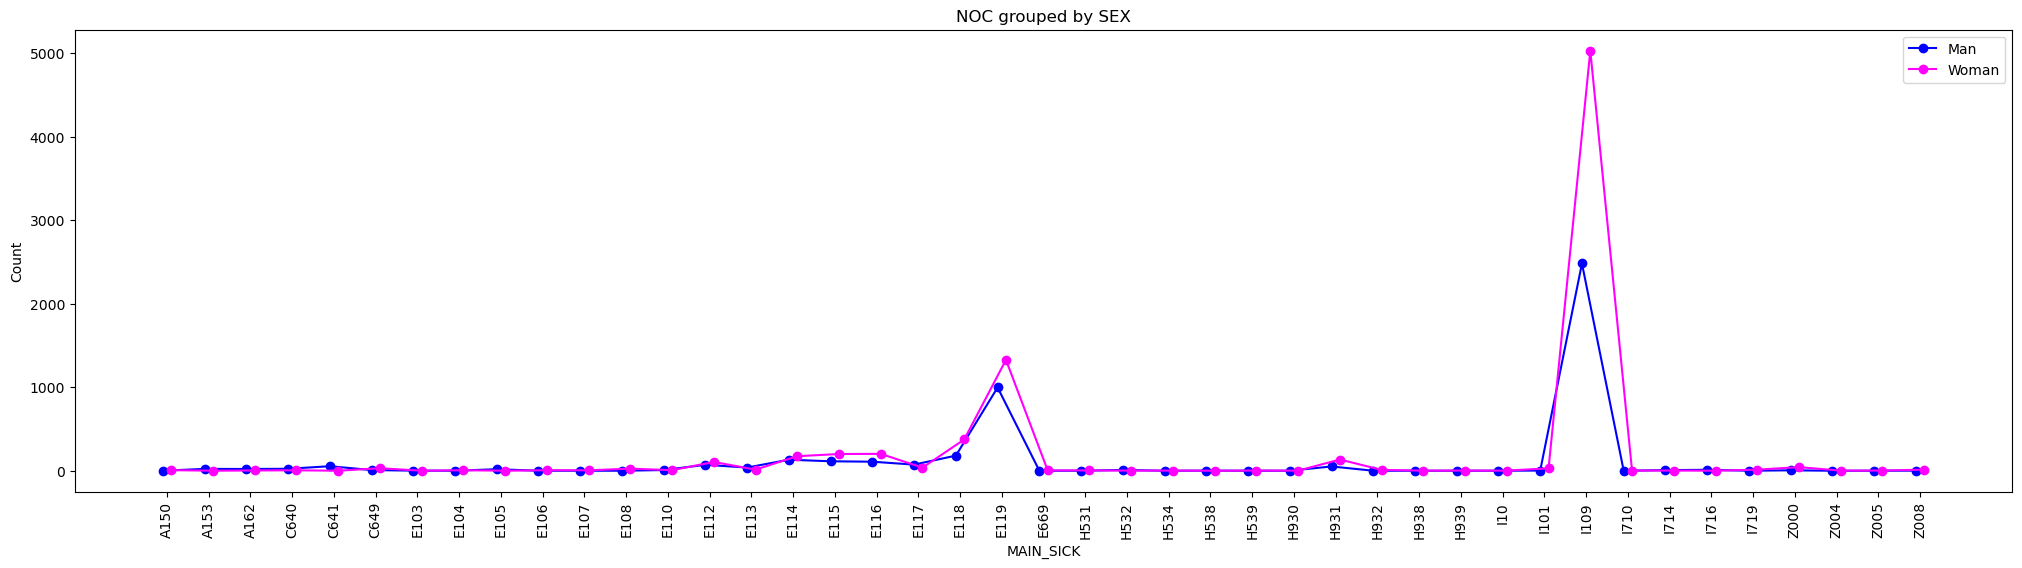

In [498]:
noc_count = noc.groupby(['MAIN_SICK','SEX_TP_CD']).size().unstack(fill_value= 0)
#print(noc_count)
noc_names = noc_count.index
sex_type = noc_count.columns
#print(noc_count.index)
#print(noc_count.keys)
x_pos = np.arange(len(noc_count))
y_m = noc_count[1]
y_w = noc_count[2]
#y_e = noc_count[9]

width = 0.1
x_m = x_pos - width
x_w = x_pos + width
#x_e = x_pos + width

plt.figure(figsize = (25, 6))
#plt.bar(x_m,y_m,width=width,label='Man', color = 'blue')
#plt.bar(x_w,y_w,width=width,label='Woman', color = 'pink')
plt.plot(x_m,y_m,label='Man', color = 'blue',marker = 'o')
plt.plot(x_w,y_w,label='Woman', color = 'magenta',marker = 'o')
#plt.bar(x_e,y_e,width=width,label='Etc', color = 'green')

plt.xticks(x_pos, noc_names, rotation = 90)
plt.title("NOC grouped by SEX")
plt.xlabel("MAIN_SICK")
plt.ylabel("Count")
plt.legend()
plt.show()

In [369]:
# 데이터 리스트를 행으로 변환
n_data = [['Z00']]

# DataFrame 생성
noc_df_ = pd.DataFrame(n_data, columns=['NOC_SICK_'])  # 컬럼 이름 지정
print(noc_df_)

noc_list_ = noc_df_['NOC_SICK_'].tolist()

noc_ = report.loc[report['MAIN_SICK'].str[:3].isin(noc_list_)]
noc_

  NOC_SICK_
0       Z00


,MID,JID,INSUP_TP_CD,SEX_TP_CD,PAT_AGE,YID,CL_CD,RVD_PLC_CD,FOM_TP_CD,MAIN_SICK,...,RVD_INSUP_BRDN_AMT,SOPR_YN,OINJ_TP_CD,PRCL_SYM_TP_CD,INJ_EXA_TP_CD,DGRSLT_TP_CD,IPAT_ARIV_PTH_TP,MAIDCL_CD,DMD_TP_CD,DGTGTP_TP_CD
214,203366,5,4,1,60,7419,10,1,31,Z008,...,21000,0,0,$,$,9,$,$,0,$
312,291367,9,4,1,65,4081,31,1,31,Z000,...,48000,0,0,$,$,1,$,$,0,$
4926,273591,113,4,2,55,8072,31,2,31,Z008,...,28000,0,0,$,$,1,$,$,0,$
7478,372205,195,4,2,55,18482,31,5,31,Z008,...,29000,0,0,$,$,1,$,$,0,$
10451,178327,253,4,2,45,7432,10,2,31,Z000,...,3000,0,0,$,$,1,$,$,0,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141790,279077,3654,4,2,55,8010,31,2,31,Z000,...,30000,0,0,$,$,1,$,$,0,$
144267,245235,3723,4,2,60,501,31,1,31,Z000,...,29000,0,0,$,$,1,$,$,0,$
144528,308497,3731,4,2,70,5760,31,5,31,Z008,...,29000,0,0,$,$,1,$,$,0,$
150771,184250,3941,4,2,50,162,21,1,31,Z000,...,24000,0,0,$,$,1,$,$,0,$


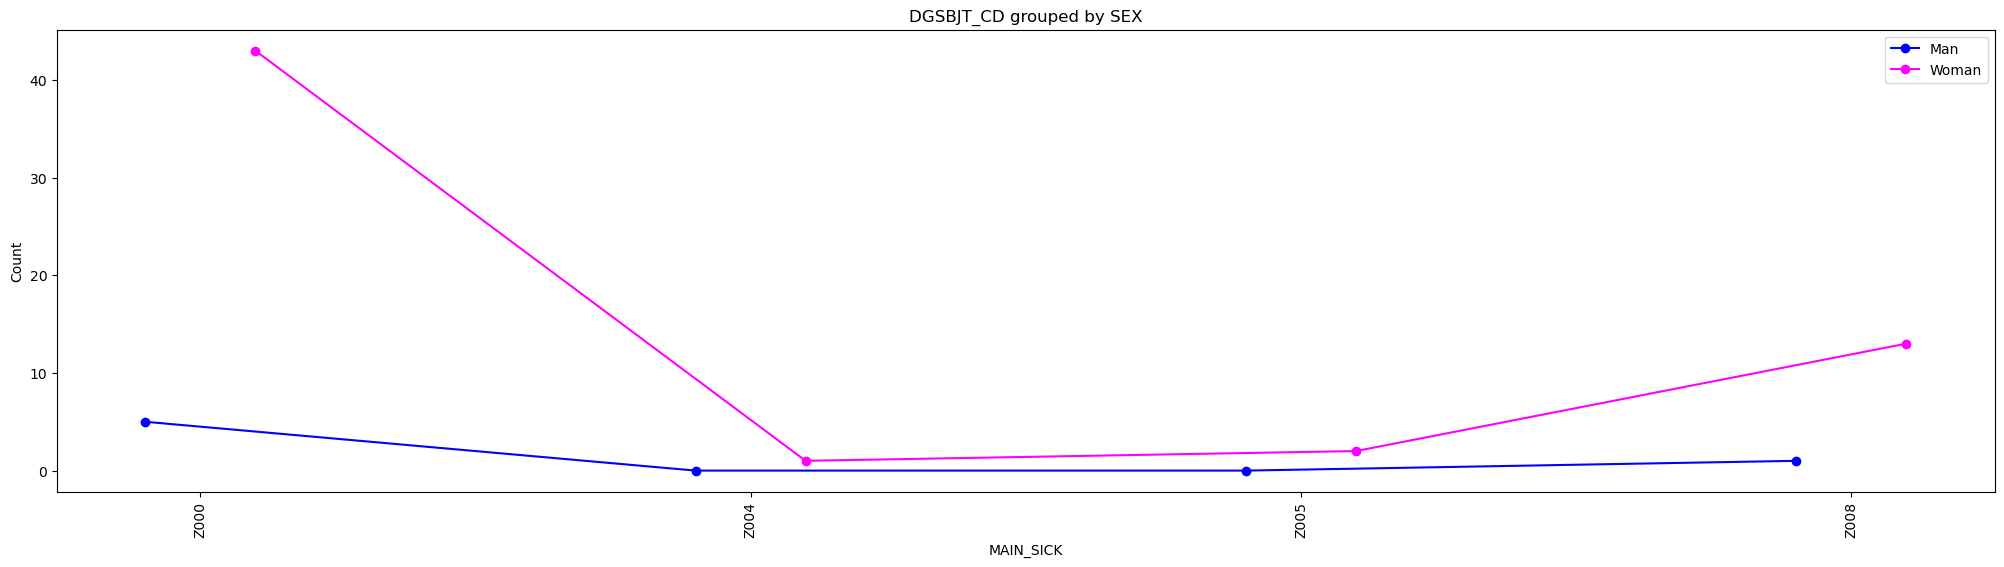

In [375]:
noc_count_ = noc_.groupby(['MAIN_SICK','SEX_TP_CD']).size().unstack(fill_value= 0)
#print(noc_count)
noc_names = noc_count_.index
sex_type = noc_count_.columns
#print(noc_count.index)
#print(noc_count.keys)
x_pos_ = np.arange(len(noc_count_))
y_m_ = noc_count_[1]
y_w_ = noc_count_[2]
#y_e = noc_count[9]

width = 0.1
x_m_ = x_pos_ - width
x_w_ = x_pos_ + width
#x_e = x_pos + width

plt.figure(figsize = (25, 6))
#plt.bar(x_m,y_m,width=width,label='Man', color = 'blue')
#plt.bar(x_w,y_w,width=width,label='Woman', color = 'pink')
plt.plot(x_m_,y_m_,label='Man', color = 'blue',marker = 'o')
plt.plot(x_w_,y_w_,label='Woman', color = 'magenta',marker = 'o')
#plt.bar(x_e,y_e,width=width,label='Etc', color = 'green')

plt.xticks(x_pos_, noc_names, rotation = 90)
plt.title("DGSBJT_CD grouped by SEX")
plt.xlabel("MAIN_SICK")
plt.ylabel("Count")
plt.legend()
plt.show()

In [436]:
age = noc.groupby('MAIN_SICK')['PAT_AGE']
age_count = noc.groupby('MAIN_SICK')['PAT_AGE'].count()
len(age_count)

43

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Index(['A150', 'A153', 'A162', 'C640', 'C641', 'C649', 'E103', 'E104', 'E105',
       'E106', 'E107', 'E108', 'E110', 'E112', 'E113', 'E114', 'E115', 'E116',
       'E117', 'E118', 'E119', 'E669', 'H531', 'H532', 'H534', 'H538', 'H539',
       'H930', 'H931', 'H932', 'H938', 'H939', 'I10', 'I101', 'I109', 'I710',
       'I714', 'I716', 'I719', 'Z000', 'Z004', 'Z005', 'Z008'],
      dtype='object', name='MAIN_SICK')
43 43


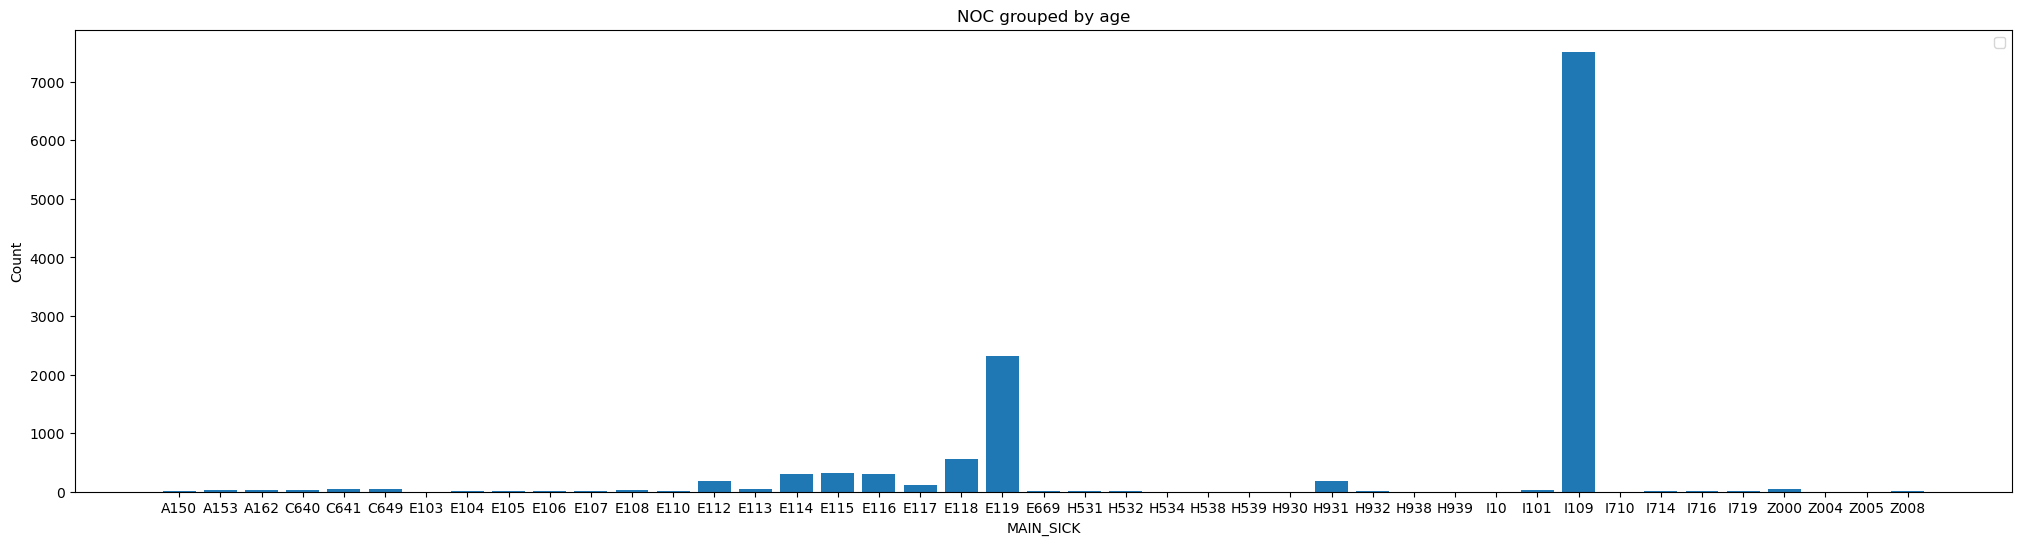

In [438]:
age_names = age_count.index
print(age_names)
x_pos_ = np.arange(len(age_names))
y_pos = age_count
print(len(x_pos), len(y_pos))

plt.figure(figsize = (25, 6))
plt.bar(x_pos,y_pos)

plt.xticks(x_pos_, age_names)
plt.title("NOC grouped by age")
plt.xlabel("MAIN_SICK")
plt.ylabel("Count")
plt.legend()
plt.show()

In [462]:
age_count = noc.groupby(['MAIN_SICK','PAT_AGE']).size().unstack(fill_value= 0)
#print(noc_count)
age_names = age_count.index
age_type = age_count.columns
#print(noc_count.index)
#print(noc_count.keys)

age_sum = age_count.sum(axis=1)
top10 = age_sum.nlargest(10)

print(top10)

MAIN_SICK
I109    7512
E119    2325
E118     555
E115     313
E116     310
E114     306
H931     185
E112     176
E117     110
C641      54
dtype: int64


In [444]:
print(age_type)

Index([30, 35, 40, 45, 50, 55, 60, 65, 70, 75], dtype='int64', name='PAT_AGE')


In [466]:
noc_10 = [['I109'], ['E119'], ['E118'], ['E115'], ['E116'], ['E114'],['H931'],['E112'], ['E117'], ['C641']]

noc10_df = pd.DataFrame(noc_10, columns=['NOC_10'])
print(noc10_df)

  NOC_10
0   I109
1   E119
2   E118
3   E115
4   E116
5   E114
6   H931
7   E112
8   E117
9   C641


In [468]:
noc10_list = noc10_df['NOC_10'].tolist()

noc10 = report.loc[report['MAIN_SICK'].isin(noc10_list)]
noc10

,MID,JID,INSUP_TP_CD,SEX_TP_CD,PAT_AGE,YID,CL_CD,RVD_PLC_CD,FOM_TP_CD,MAIN_SICK,...,RVD_INSUP_BRDN_AMT,SOPR_YN,OINJ_TP_CD,PRCL_SYM_TP_CD,INJ_EXA_TP_CD,DGRSLT_TP_CD,IPAT_ARIV_PTH_TP,MAIDCL_CD,DMD_TP_CD,DGTGTP_TP_CD
26,68867,2,4,2,60,8076,31,2,31,E119,...,8000,0,0,$,$,1,$,$,0,$
43,95982,2,4,2,60,8076,31,2,31,E119,...,42000,0,0,$,$,1,$,$,0,$
91,219585,2,4,2,60,8412,31,2,31,I109,...,14000,0,0,$,$,1,$,$,0,$
96,226210,2,4,2,60,8412,31,2,31,I109,...,10000,0,0,$,$,1,$,$,0,$
102,237578,2,4,2,60,8412,31,2,31,I109,...,64000,0,0,$,$,1,$,$,0,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152857,215548,3985,4,1,70,21984,31,5,31,I109,...,12000,0,0,$,$,1,$,$,0,$
153443,139620,3996,4,2,75,3380,31,1,31,H931,...,11000,0,0,$,$,1,$,$,0,$
153454,172137,3996,4,2,75,3380,31,1,31,H931,...,11000,0,0,$,$,1,$,$,0,$
153478,226896,3996,4,2,75,3380,31,1,31,H931,...,15000,0,0,$,$,1,$,$,0,$


In [470]:
noc10_count = noc10.groupby(['MAIN_SICK','PAT_AGE']).size().unstack(fill_value= 0)

noc10_names = noc10_count.index
noc10_type = noc10_count.columns
#print(noc_count.index)
#print(noc_count.keys)

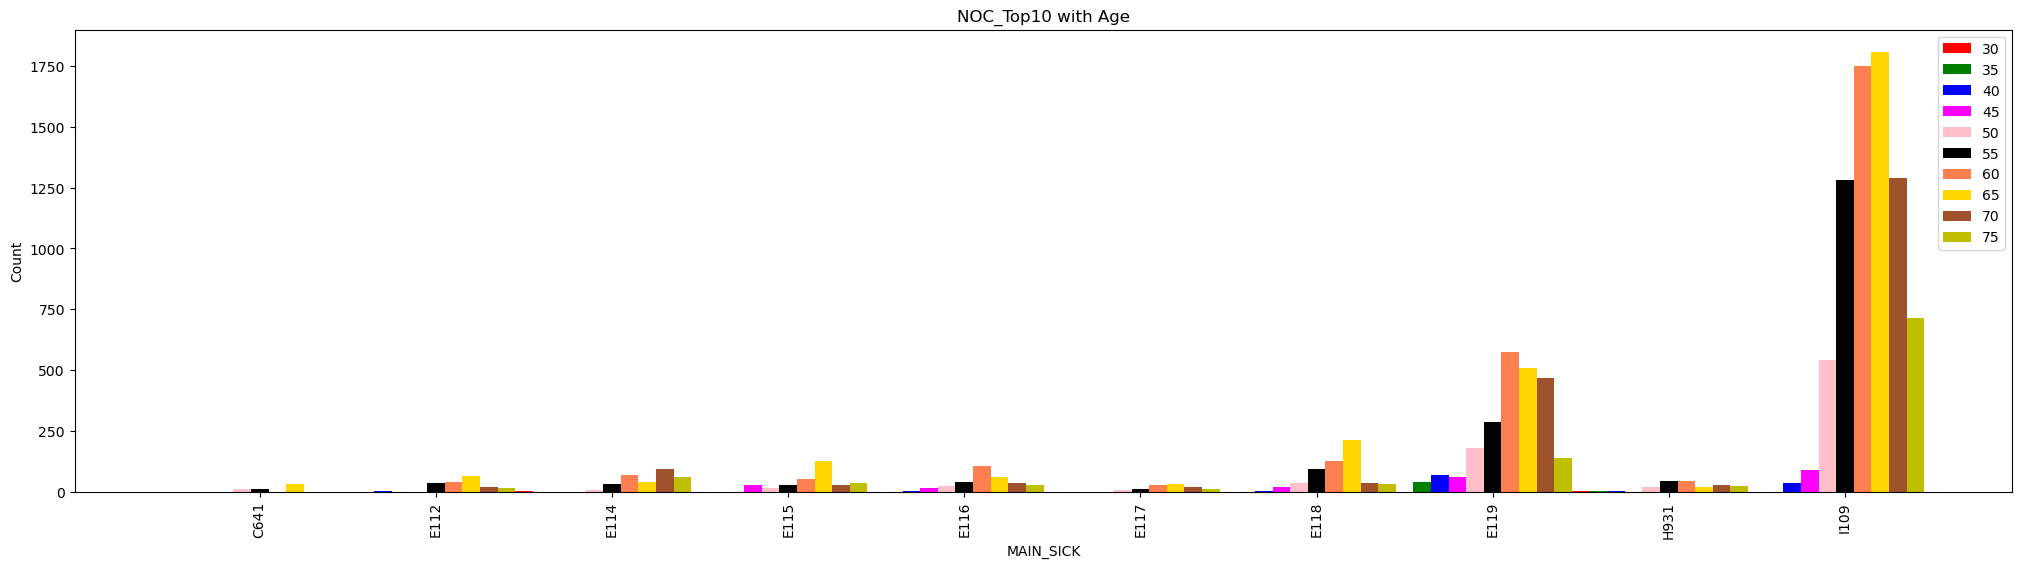

In [496]:
x_pos = np.arange(len(noc10_count))
#y_pos = noc10_type
y_30 = noc10_count[30]
y_35 = noc10_count[35]
y_40 = noc10_count[40]
y_45 = noc10_count[45]
y_50 = noc10_count[50]
y_55 = noc10_count[55]
y_60 = noc10_count[60]
y_65 = noc10_count[65]
y_70 = noc10_count[70]
y_75 = noc10_count[75]

width = 0.1
x_30 = x_pos - (width*5)
x_35 = x_pos - (width*4)
x_40 = x_pos - (width*3)
x_45 = x_pos - (width*2)
x_50 = x_pos - (width*1)
x_55 = x_pos + (width*1) - 0.1
x_60 = x_pos + (width*2) - 0.1
x_65 = x_pos + (width*3) - 0.1
x_70 = x_pos + (width*4) - 0.1
x_75 = x_pos + (width*5) - 0.1

plt.figure(figsize = (25, 6))
#plt.bar(x_m,y_m,width=width,label='Man', color = 'blue')
#plt.bar(x_w,y_w,width=width,label='Woman', color = 'pink')

plt.bar(x_30,y_30,width=width,label='30', color = 'red')
plt.bar(x_35,y_35,width=width,label='35', color = 'green')
plt.bar(x_40,y_40,width=width,label='40', color = 'blue')
plt.bar(x_45,y_45,width=width,label='45', color = 'magenta')
plt.bar(x_50,y_50,width=width,label='50', color = 'pink')
plt.bar(x_55,y_55,width=width,label='55', color = 'black')
plt.bar(x_60,y_60,width=width,label='60', color = 'coral')
plt.bar(x_65,y_65,width=width,label='65', color = 'gold')
plt.bar(x_70,y_70,width=width,label='70', color = 'sienna')
plt.bar(x_75,y_75,width=width,label='75', color = 'y')

plt.xticks(x_pos, noc10_names, rotation = 90)
plt.title("NOC_Top10 with Age")
plt.xlabel("MAIN_SICK")
plt.ylabel("Count")
plt.legend()
plt.show()

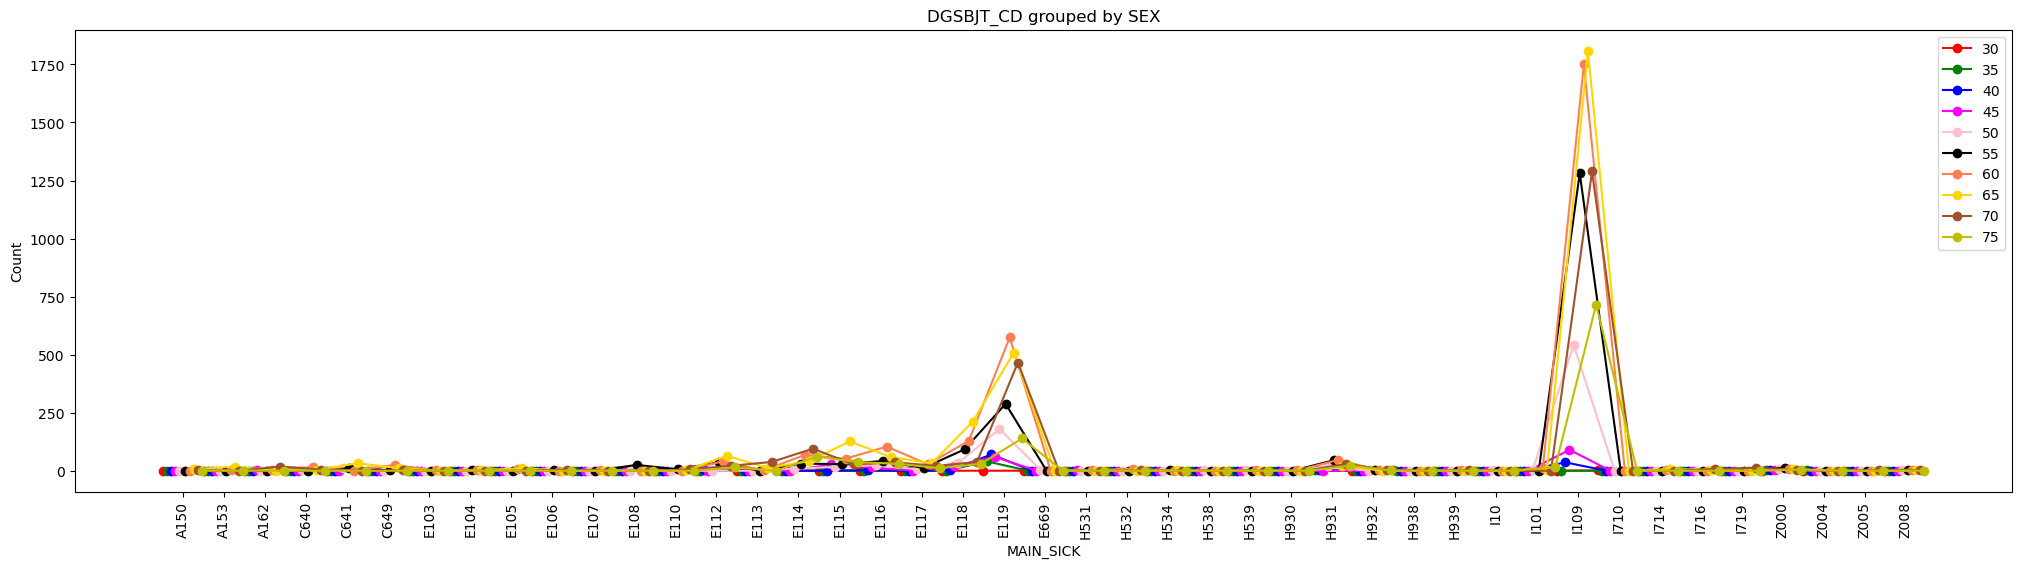

In [448]:
x_pos = np.arange(len(age_count))
y_30 = age_count[30]
y_35 = age_count[35]
y_40 = age_count[40]
y_45 = age_count[45]
y_50 = age_count[50]
y_55 = age_count[55]
y_60 = age_count[60]
y_65 = age_count[65]
y_70 = age_count[70]
y_75 = age_count[75]
y_pos = age_type

width = 0.1
x_30 = x_pos - (width*5)
x_35 = x_pos - (width*4)
x_40 = x_pos - (width*3)
x_45 = x_pos - (width*2)
x_50 = x_pos - (width*1)
x_55 = x_pos + (width*1) - 0.05
x_60 = x_pos + (width*2) - 0.05
x_65 = x_pos + (width*3) - 0.05
x_70 = x_pos + (width*4) - 0.05
x_75 = x_pos + (width*5) - 0.05

plt.figure(figsize = (25, 6))
#plt.bar(x_m,y_m,width=width,label='Man', color = 'blue')
#plt.bar(x_w,y_w,width=width,label='Woman', color = 'pink')
plt.plot(x_30,y_30,label='30', color = 'red',marker = 'o')
plt.plot(x_35,y_35,label='35', color = 'green',marker = 'o')
plt.plot(x_40,y_40,label='40', color = 'blue',marker = 'o')
plt.plot(x_45,y_45,label='45', color = 'magenta',marker = 'o')
plt.plot(x_50,y_50,label='50', color = 'pink',marker = 'o')
plt.plot(x_55,y_55,label='55', color = 'black',marker = 'o')
plt.plot(x_60,y_60,label='60', color = 'coral',marker = 'o')
plt.plot(x_65,y_65,label='65', color = 'gold',marker = 'o')
plt.plot(x_70,y_70,label='70', color = 'sienna',marker = 'o')
plt.plot(x_75,y_75,label='75', color = 'y',marker = 'o')
#plt.bar(x_e,y_e,width=width,label='Etc', color = 'green')

plt.xticks(x_pos, noc_names, rotation = 90)
plt.title("NOC_")
plt.xlabel("MAIN_SICK")
plt.ylabel("Count")
plt.legend()
plt.show()